In [73]:
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [74]:
def diabets():
    dataset = pd.read_csv('/content/diabetes.csv')  
 
    X = dataset.drop('Outcome', axis=1)
    y = dataset['Outcome']
    return X, y


In [75]:
x, y = diabets()


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=True, random_state=10)
scaler = StandardScaler()

X_train= scaler.fit_transform(X_train.values)



In [77]:


X_test=scaler.transform(X_test.values,)

In [78]:
X_val = X_train[-X_test.shape[0]:]
y_val=y_train[-y_test.shape[0]:]
X_train=X_train[:-X_val.shape[0]]
y_train=y_train[:-y_test.shape[0]]
y_val.shape


(116,)

In [79]:
print(X_val.shape,y_val.shape,X_train.shape,y_train.shape,X_test.shape,y_test.shape)


(116, 8) (116,) (536, 8) (536,) (116, 8) (116,)


In [80]:
print(X_test)

[[ 0.05595251  1.00385237  0.16827874  0.52041946  0.36328163 -0.05756811
  -0.39240263  0.32528686]
 [-0.53723509 -0.29459803  0.86903071  1.3426143   0.64700582  0.83491113
  -0.67567413 -0.43670248]
 [-0.83382889  0.41645815 -0.73268808 -1.3137075  -0.68816682 -0.6357941
   0.68218167  2.44192389]
 [-0.24064129 -0.44917545 -0.33225838 -0.49151265 -0.28761503 -1.11345904
   0.65447033 -0.86002988]
 [-0.24064129 -0.60375288  0.26838616 -1.3137075  -0.68816682 -0.28383045
  -1.06055389 -0.09804055]
 [-0.83382889 -0.75833031 -0.13204354 -0.36502114  0.48010924 -1.07574865
   0.06637405 -0.94469536]
 [-1.13042269 -0.54192191 -0.23215096  0.14094492  0.27983334 -0.49752267
  -0.03523421 -0.86002988]
 [ 0.94573391 -0.23276705 -0.13204354 -1.3137075  -0.68816682  0.13098384
  -0.63872568  0.74861426]
 [ 0.05595251 -1.19114711  0.86903071 -0.11203811 -0.68816682 -0.30897071
  -0.45706243  0.07129041]
 [-1.13042269  0.47828912  0.76892328  0.39392794 -0.68816682 -0.56037332
  -0.7218597   2.1

In [81]:
print(len(X_train))
print(len(X_test))
print(len(X_val))

536
116
116


In [82]:
print(X_train.shape)
print(X_test)
print(y_test)


(536, 8)
[[ 0.05595251  1.00385237  0.16827874  0.52041946  0.36328163 -0.05756811
  -0.39240263  0.32528686]
 [-0.53723509 -0.29459803  0.86903071  1.3426143   0.64700582  0.83491113
  -0.67567413 -0.43670248]
 [-0.83382889  0.41645815 -0.73268808 -1.3137075  -0.68816682 -0.6357941
   0.68218167  2.44192389]
 [-0.24064129 -0.44917545 -0.33225838 -0.49151265 -0.28761503 -1.11345904
   0.65447033 -0.86002988]
 [-0.24064129 -0.60375288  0.26838616 -1.3137075  -0.68816682 -0.28383045
  -1.06055389 -0.09804055]
 [-0.83382889 -0.75833031 -0.13204354 -0.36502114  0.48010924 -1.07574865
   0.06637405 -0.94469536]
 [-1.13042269 -0.54192191 -0.23215096  0.14094492  0.27983334 -0.49752267
  -0.03523421 -0.86002988]
 [ 0.94573391 -0.23276705 -0.13204354 -1.3137075  -0.68816682  0.13098384
  -0.63872568  0.74861426]
 [ 0.05595251 -1.19114711  0.86903071 -0.11203811 -0.68816682 -0.30897071
  -0.45706243  0.07129041]
 [-1.13042269  0.47828912  0.76892328  0.39392794 -0.68816682 -0.56037332
  -0.7218

In [83]:
#Define model
model = Sequential()
model.add(Dense(10 , activation='linear' , input_dim= 8)) #hidden_layer  #input
model.add(Dense(10 , activation= 'linear'))
model.add(Dense(1, activation= 'sigmoid')) #output

In [84]:
#compile model
model.compile(loss= 'binary_crossentropy' , optimizer ='rmsprop', metrics= 'accuracy')

early = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=15,
    verbose=1,
    mode="auto",
    restore_best_weights=True,
)

model_filename = 'model.h5'
callback_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_filename, 
    verbose=1,
    monitor='val_loss',
    save_best_only=True,
)

In [85]:
#fit model on training data
history = model.fit(X_train , y_train , epochs=100, batch_size=20, validation_data=(X_val, y_val), callbacks=[callback_checkpoint, early])

Epoch 1/100
 1/27 [>.............................] - ETA: 14s - loss: 1.0109 - accuracy: 0.3500
Epoch 00001: val_loss improved from inf to 0.55667, saving model to model.h5
27/27 [==============================] - 1s 7ms/step - loss: 0.7040 - accuracy: 0.6007 - val_loss: 0.5567 - val_accuracy: 0.6466
Epoch 2/100
 1/27 [>.............................] - ETA: 0s - loss: 0.5375 - accuracy: 0.7000
Epoch 00002: val_loss improved from 0.55667 to 0.52157, saving model to model.h5
27/27 [==============================] - 0s 3ms/step - loss: 0.5993 - accuracy: 0.6922 - val_loss: 0.5216 - val_accuracy: 0.6983
Epoch 3/100
 1/27 [>.............................] - ETA: 0s - loss: 0.6522 - accuracy: 0.7000
Epoch 00003: val_loss improved from 0.52157 to 0.50625, saving model to model.h5
27/27 [==============================] - 0s 3ms/step - loss: 0.5517 - accuracy: 0.7295 - val_loss: 0.5063 - val_accuracy: 0.7328
Epoch 4/100
 1/27 [>.............................] - ETA: 0s - loss: 0.6945 - accuracy: 

In [86]:
#Evaluate model on test data
model.load_weights(model_filename)
loss , acc = model.evaluate(X_test , y_test)
print('\nTesting loss: %.2f, acc: %.2f%%' %(loss ,acc))

4/4 [==============================] - 0s 3ms/step - loss: 0.4915 - accuracy: 0.7759

Testing loss: 0.49, acc: 0.78%


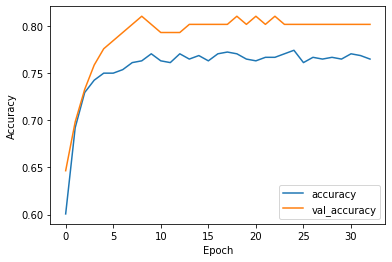

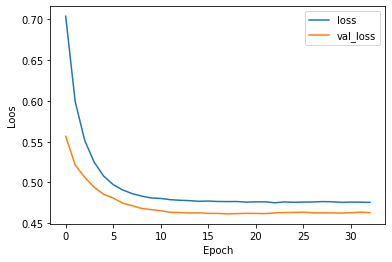

In [88]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loos')
plt.legend()
plt.show()

In [89]:

np.argmax(model.predict(X_train),axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

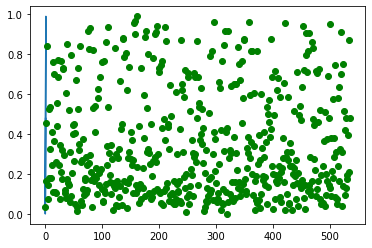

In [90]:

x = model.predict(X_train).copy()
x=x.reshape(x.shape[0],)

# x=np.argmax(model.predict(X_train),axis=1)
y = y_train.values.copy()
y=y.reshape(-1,1)
m, b = np.polyfit(x, y, 1)
plt.plot(x,m*x+b)
plt.plot(x, 'o', color='green')



In [93]:
from sklearn.linear_model import LinearRegression
x = model.predict(X_train).copy()

reg = LinearRegression().fit(x, y_train)

In [94]:
import matplotlib.pyplot as plt

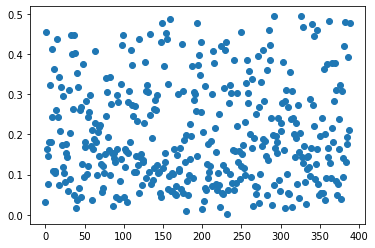

In [95]:
plt.plot(x[np.where(x<0.5)],'o')